# Notebook 04: Expectation Maximization

En este notebook se va a implementar el algoritmo de clustering Expectation-Maximization. En la primera parte se explica la implementación manual del algoritmo y luego se muestra como realizar los cálculos de forma sencilla con la librería scipy.cluster.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos unidimensionales

Vamos a generar los datos 1D aleatorios según tres distribuciones normales.

In [2]:
d1 = np.random.randn(2000) * 0.2 + 2
d2 = np.random.randn(2000) * 0.4 - 3
d3 = np.random.randn(2000) * 0.8 + 0

datos = np.concatenate([d1, d2, d3])

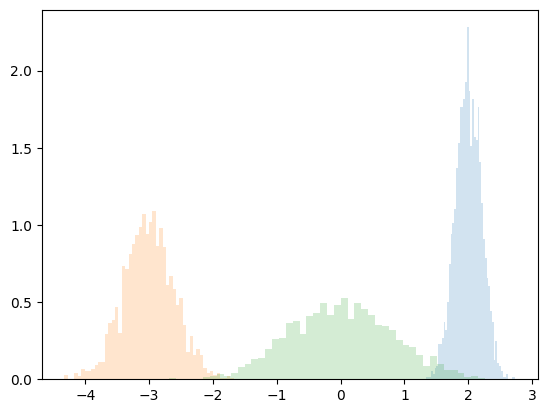

In [3]:
plt.hist(d1, bins=50, alpha=0.2, density=True)
plt.hist(d2, bins=50, alpha=0.2, density=True)
plt.hist(d3, bins=50, alpha=0.2, density=True)
plt.show()

In [4]:
from scipy.stats import norm

In [5]:
def genera_gaussiana(rango, media, varianza, color='blue'):
  std = np.sqrt(varianza)
  plt.plot(rango, norm.pdf(rango, media, std), color=color)

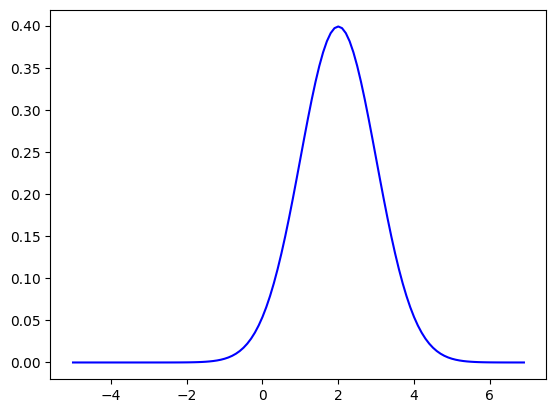

In [6]:
genera_gaussiana(np.arange(-5, 7, 0.1), media=2.0, varianza=1.0)
plt.show()

## Implementación manual

In [7]:
def expectation(X, media, varianza):
  std = np.sqrt(varianza)
  P_x_g = norm.pdf(X, media, std)
  P_g = 1 # len(X) / len(datos)
  P_x = 1 # 1 / len(X)
  P_g_x = P_x_g * P_g / P_x
  return P_g_x

In [8]:
def maximization(thetas, X, epsilon=1e-8):
  media = np.sum(thetas * X) / np.sum(thetas)
  varianza = np.sum(thetas * (X - media)**2) / np.sum(thetas)
  return media, varianza

In [9]:
K = 3

In [10]:
medias_ini = np.random.choice(datos, K, replace=False)
distancias = np.abs(datos[:, None] - medias_ini[None, :])
indices = np.argmin(distancias, axis=1)

medias = []
varianzas = []
for i in range(K):
  medias.append(np.mean(datos[indices == i]))
  varianzas.append(np.std(datos[indices == i])**2)

converged = False
stop_value = 1e-3
iter = 1
while not converged:
  if iter > 1:
    indices_old = indices
    thetas_old = thetas

  # Paso 1: Expectation
  thetas = np.zeros((K, len(datos)))
  for i in range(K):
    thetas[i] = expectation(datos, medias[i], varianzas[i])
  thetas = thetas / thetas.sum(axis=0, keepdims=True)
  indices = np.argmax(thetas, axis=0)

  # Paso 2: Maximization
  medias = []
  varianzas = []
  for i in range(K):
    media, varianza = maximization(thetas[i], datos)
    medias.append(media)
    varianzas.append(varianza)

  # Checking if converged
  if iter > 1:
    like = 0.0
    for i, (j_old, j) in enumerate(zip(indices_old, indices)):
      like += np.abs(thetas[j, i] - thetas_old[j_old, i])
    print(" > Iter", iter, like)

    if like < stop_value:
      converged = True
  iter += 1

 > Iter 2 94.54024837192635
 > Iter 3 63.30263963680129
 > Iter 4 41.77863612614649
 > Iter 5 24.898424393600997
 > Iter 6 15.713812612554149
 > Iter 7 9.56193265499578
 > Iter 8 5.821313608560701
 > Iter 9 3.554511567363943
 > Iter 10 2.1658153025513256
 > Iter 11 1.3204649838513958
 > Iter 12 0.8045427544863076
 > Iter 13 0.48915316428684263
 > Iter 14 0.2988257962352021
 > Iter 15 0.18214132341369893
 > Iter 16 0.11102413159137592
 > Iter 17 0.06767645346066986
 > Iter 18 0.041253874605346796
 > Iter 19 0.02514757843900639
 > Iter 20 0.015329579150519246
 > Iter 21 0.009344711876278278
 > Iter 22 0.005696427812437066
 > Iter 23 0.0034724811460502547
 > Iter 24 0.002116789016208931
 > Iter 25 0.001290373641695819
 > Iter 26 0.0007865992649677134


-3.0097605505556406 0.15226732757241673
0.00042338280553281377 0.6596703093825669
1.9972174389573807 0.04116809559461176


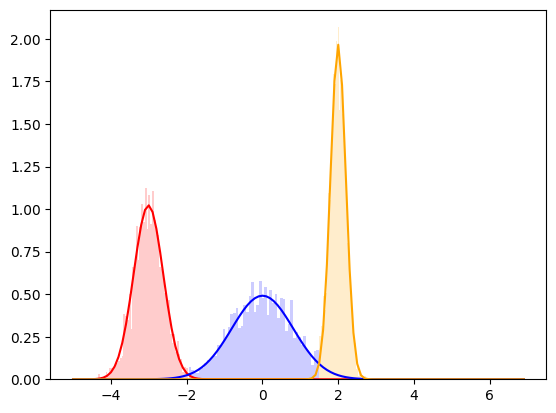

In [11]:
for i, (mean, var, color) in enumerate(zip(medias, varianzas, ['red', 'blue', 'orange'])):
  print(mean, var)
  dx = datos[indices == i]
  plt.hist(dx, bins=50, density=True, alpha=0.2, color=color)
  genera_gaussiana(np.arange(-5, 7, 0.1), mean, var, color=color)

## Implementación con Sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [12]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [13]:
K = 3
gm = GaussianMixture(n_components=K).fit(datos[:, None])

In [ ]:
indices = gm.predict(datos[:, None])

[-0.00449608] [[0.59331496]]
[2.00419781] [[0.04068149]]
[-2.98863115] [[0.15317662]]


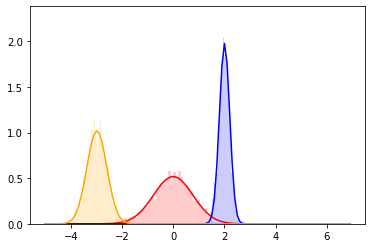

In [ ]:
for i, (mean, var, color) in enumerate(zip(gm.means_, gm.covariances_, ['red', 'blue', 'orange'])):
  print(mean, var)
  dx = datos[indices == i]
  plt.hist(dx, bins=50, density=True, alpha=0.2, color=color)
  genera_gaussiana(np.arange(-5, 7, 0.1), mean[0], var[0][0], color=color)

# Datos multidimensionales

Primero generamos los puntos aleatorios según tres distribuciones normales.

In [ ]:
media1 = np.array([2, 2])
std1 = np.array([1, 1])
d1 = np.random.randn(2000, 2) * std1[None, :] + media1[None, :]
media2 = np.array([-3, -1])
std2 = np.array([0.2, 1.2])
d2 = np.random.randn(2000, 2) * std2[None, :] + media2[None, :]
media3 = np.array([0, -4])
std3 = np.array([0.8, 1.2])
d3 = np.random.randn(2000, 2) * std3[None, :] + media3[None, :]

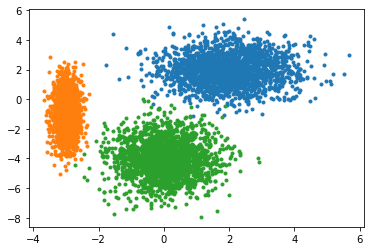

In [ ]:
plt.plot(d1[:, 0], d1[:, 1], '.')
plt.plot(d2[:, 0], d2[:, 1], '.')
plt.plot(d3[:, 0], d3[:, 1], '.')
plt.show()

Nuestro conjunto de datos va a ser la concatenación de las tres distribuciones.

In [ ]:
datos = np.concatenate((d1, d2, d3), axis=0)
datos = datos[np.random.permutation(len(datos))]

Si quisiéramos implementar manualmente el algoritmo EM para datos multivariados hay que considerar que tenemos que usar la matriz de covarianzas y tenemos que calcularlas de forma diferente.

$$\mu_j^{(t+1)} = \frac{\sum \theta_{ij}^{(t)} x_i}{\sum \theta_{ij}^{(t)}}$$

$$\Sigma_j^{(t+1)} = \frac{\sum \theta_{ij}^{(t)} (x_i - \mu_j^{(t+1)})(x_i - \mu_j^{(t+1)})^T}{\sum \theta_{ij}^{(t)}}$$

Además, la PDF también se modifica:
https://en.wikipedia.org/wiki/Multivariate_normal_distribution

$$ PDF = (2\pi)^{-d/2}\frac{1}{\sqrt{|\Sigma|}} exp(-0.5(x - \mu)^T \Sigma^{-1}(x-\mu)) $$

En este caso, no lo vamos a implementar manualmente, ya que el algoritmo es el mismo con cálculos más complejos.

In [ ]:
K = 3
gm = GaussianMixture(n_components=K).fit(datos)

In [ ]:
gm.means_

array([[ 0.00674448, -4.00885323],
       [ 1.97272833,  1.97551829],
       [-2.99992588, -1.0333284 ]])

In [ ]:
gm.covariances_

array([[[ 0.62878364,  0.00824129],
        [ 0.00824129,  1.43199531]],

       [[ 1.0738675 ,  0.02521285],
        [ 0.02521285,  1.0403752 ]],

       [[ 0.0403846 , -0.00280299],
        [-0.00280299,  1.43067507]]])

In [ ]:
indices = gm.predict(datos)

In [ ]:
from matplotlib.colors import LogNorm

In [ ]:
def draw_gaussian_curves(gm, datos, space=0.1):
    X, Y = np.meshgrid(np.arange(datos[:, 0].min()-0.5, datos[:, 0].max()+0.5, space),
                       np.arange(datos[:, 1].min()-0.5, datos[:, 1].max()+0.5, space))
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gm.score_samples(XX)
    Z = Z.reshape(X.shape)

    indices = gm.predict(datos)

    vmin = (-gm.score_samples(datos)).min()
    vmax = (-gm.score_samples(datos)).max()
    CS = plt.contour(X, Y, Z, norm = LogNorm(vmin=vmin, vmax=vmax), levels=np.logspace(0, 2, 20))
    for i in np.unique(indices):
      plt.scatter(datos[indices == i, 0], datos[indices == i, 1], 0.8)
    plt.show()

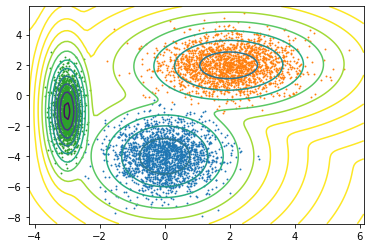

In [ ]:
draw_gaussian_curves(gm, datos)